In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
metric = 'AUC'

in_files = {'nucleosome-sized':'../../MBC/ATAC_nucleosome_profiling/analysis/logreg_results/5e-4_qval_logreg_results/5e-4_qval.'+metric+'.txt',
            
            'short-fragment':'../../MBC/other_analysis/logreg_results/short-fragments_logreg_results/short-fragments.'+metric+'.txt',
            'all-fragment':'../../MBC/other_analysis/logreg_results/all-fragments_logreg_results/all-fragments.'+metric+'.txt',

            'no-GC-correction':'../../MBC/ATAC_nucleosome_profiling/analysis/logreg_results/uncorrected_5e-4_qval_logreg_results/uncorrected_5e-4_qval.'+metric+'.txt',
            'GC-map-corrected':'../../MBC/ATAC_nucleosome_profiling/analysis/logreg_results/GC_map_corrected_5e-4_qval_logreg_results/GC_map_corrected_5e-4_qval.'+metric+'.txt',
            'CNA-corrected':'../../MBC/other_analysis/logreg_results/CNA-corrected_logreg_results/CNA-corrected.'+metric+'.txt',
            'single-length-GC-corr.':'../../Griffin_single_fragment_length/MBC_ULP/griffin_single_fragment_length_nucleosome_profiling/analysis/logreg_results/single-fragment-length-GC-correction_logreg_results/single-fragment-length-GC-correction.'+metric+'.txt',
            
            'no-amplitude':'../../MBC/other_analysis/logreg_results/no-amplitude_logreg_results/no-amplitude.'+metric+'.txt',
            
            'TFBS':'../../MBC/number_of_TFBS_sites_analysis/logreg_results/30000-sites_logreg_results/30000-sites.'+metric+'.txt',
        
            'Ulz':'../../MBC/Ulz_analysis/logreg_results/Ulz_MBC_logreg_results/Ulz_MBC.'+metric+'.txt'}
                      


In [3]:
boxplot_data = pd.DataFrame()
site_groups = in_files.keys()

for group in site_groups:
    current = pd.read_csv(in_files[group], sep='\t')
    current = current[['overall','high_tfx','low_tfx']]
    current['site_group'] = group
    current = current.set_index('site_group').stack().reset_index()
    current = current.rename(columns = {'level_1':'group',0:metric})
    current['group'] = current['group'].str.capitalize()
    boxplot_data = boxplot_data.append(current)
    
metrics_df = pd.DataFrame(index = boxplot_data['group'].unique())
for site_group in site_groups:
    df = boxplot_data[boxplot_data['site_group']==site_group]
    metrics_df[site_group] = np.round(df.groupby('group')[metric].median(),3).astype(str) + ' ('+ \
        np.round(df.groupby('group')[metric].quantile(0.025),3).astype(str) + '-' + \
        np.round(df.groupby('group')[metric].quantile(0.975),3).astype(str) + ')'
#format for table
# metrics_df = np.round(metrics_df,3)
metrics_df.columns = metrics_df.columns 
metrics_df.index = metrics_df.index.str.replace('_',' ')    

print(metric)
metrics_df.loc[['Low tfx','High tfx','Overall']]

AUC


,nucleosome-sized,short-fragment,all-fragment,no-GC-correction,GC-map-corrected,CNA-corrected,single-length-GC-corr.,no-amplitude,TFBS,Ulz
Low tfx,0.75 (0.417-1.0),0.622 (0.321-0.893),0.679 (0.35-1.0),0.722 (0.425-0.959),0.745 (0.416-1.0),0.733 (0.389-1.0),0.75 (0.416-1.0),0.792 (0.5-1.0),0.667 (0.318-0.933),0.593 (0.25-0.884)
High tfx,0.924 (0.842-0.99),0.87 (0.758-0.96),0.927 (0.853-0.987),0.908 (0.816-0.979),0.924 (0.843-0.989),0.93 (0.853-0.992),0.923 (0.842-0.988),0.925 (0.846-0.99),0.824 (0.69-0.934),0.541 (0.38-0.699)
Overall,0.892 (0.811-0.956),0.808 (0.706-0.897),0.883 (0.803-0.952),0.871 (0.786-0.942),0.891 (0.808-0.955),0.895 (0.816-0.961),0.889 (0.815-0.956),0.9 (0.823-0.961),0.789 (0.663-0.885),0.551 (0.414-0.685)


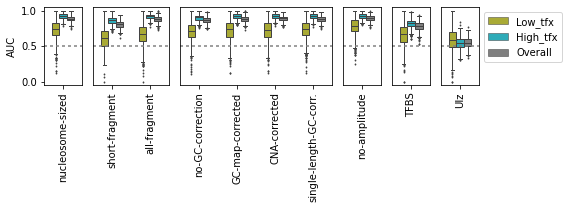

In [4]:
fig = plt.figure(figsize = (8,3))
from matplotlib import gridspec
spec = gridspec.GridSpec(ncols=6, nrows=1,
                         width_ratios=[1,2,4,1,1,1])

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])
ax3 = fig.add_subplot(spec[3])
ax4 = fig.add_subplot(spec[4])
ax5 = fig.add_subplot(spec[5])

current_groups = ['nucleosome-sized']
current = boxplot_data[boxplot_data['site_group'].isin(current_groups)]
sns.boxplot(x = current['site_group'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = ['Low_tfx','High_tfx','Overall'],
            palette = ['tab:olive','tab:cyan','tab:grey'],
           ax = ax0, fliersize = 1, linewidth = 1)


current_groups = ['short-fragment','all-fragment']
current = boxplot_data[boxplot_data['site_group'].isin(current_groups)]
sns.boxplot(x = current['site_group'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = ['Low_tfx','High_tfx','Overall'],
            palette = ['tab:olive','tab:cyan','tab:grey'],
           ax = ax1, fliersize = 1, linewidth = 1)


current_groups = ['no-GC-correction','GC-map-corrected','CNA-corrected','single-length-GC-corr.']
current = boxplot_data[boxplot_data['site_group'].isin(current_groups)]
sns.boxplot(x = current['site_group'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = ['Low_tfx','High_tfx','Overall'],
            palette = ['tab:olive','tab:cyan','tab:grey'],
           ax = ax2, fliersize = 1, linewidth = 1)

current_groups = ['no-amplitude']
current = boxplot_data[boxplot_data['site_group'].isin(current_groups)]
sns.boxplot(x = current['site_group'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = ['Low_tfx','High_tfx','Overall'],
            palette = ['tab:olive','tab:cyan','tab:grey'],
           ax = ax3, fliersize = 1, linewidth = 1)

current_groups = ['TFBS']
current = boxplot_data[boxplot_data['site_group'].isin(current_groups)]
sns.boxplot(x = current['site_group'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = ['Low_tfx','High_tfx','Overall'],
            palette = ['tab:olive','tab:cyan','tab:grey'],
           ax = ax4, fliersize = 1, linewidth = 1)

current_groups = ['Ulz']
current = boxplot_data[boxplot_data['site_group'].isin(current_groups)]
sns.boxplot(x = current['site_group'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = ['Low_tfx','High_tfx','Overall'],
            palette = ['tab:olive','tab:cyan','tab:grey'],
           ax = ax5, fliersize = 1, linewidth = 1)


for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.tick_params(left = False, labelleft=False)

    
for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_ylim(-0.05,1.05)
    ax.axhline(0.5,color = 'grey', dashes = [2,2])
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.tick_params(axis = 'x', rotation=90)
    
ax0.set_ylabel(metric)

ax5.legend(bbox_to_anchor = [1,1], loc = 'upper left')
fig.tight_layout()
fig.savefig('plots/other_comparisons_'+metric+'.pdf')